# Combine Data Sets

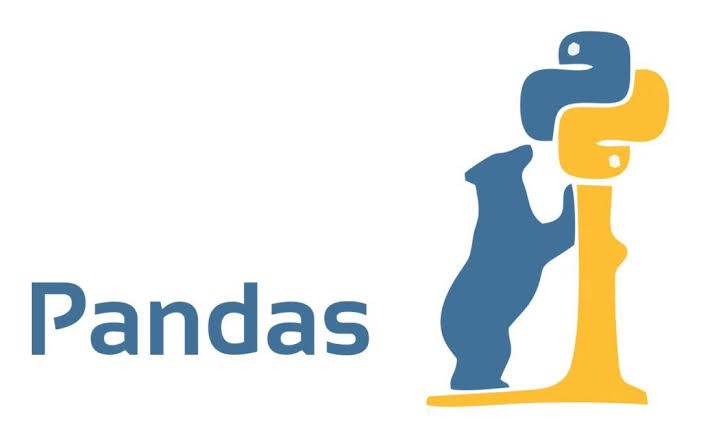

In [1]:
import pandas as pd

In [2]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [3]:
bdf = pd.DataFrame({"x1": ["A", "B", "D"], "x3": ["T", "F", "T"]})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


## pd.merge(): 데이터 프레임 합치기

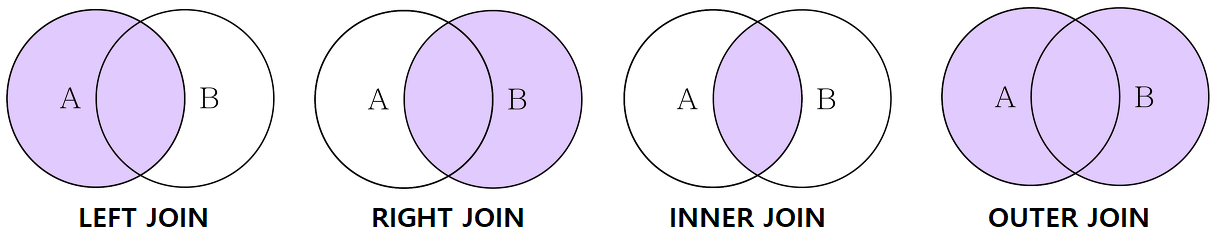

- how는 데이터를 어떠한 방법으로 합칠지에 관한 옵션입니다.
- on은 기준이 되는 열을 의미합니다.

### left

- 왼쪽 데이터프레임을 기준으로 조입합니다.
- 오른쪽 데이터프레임에 존해하지 않는 값은 NaN으로 표시됩니다.

In [4]:
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


### right

- 오른쪽 데이터프레임을 기준으로 조입합니다.
- 왼쪽 데이터프레임에 존해하지 않는 값은 NaN으로 표시됩니다.

In [5]:
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


### inner

- 교집합을 의미하며. 두 데이터프리임에 공통으로 존재하는 값만 표시됩니다.

In [6]:
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


### outer

- 두 데이터프레임에 모든 값이 표시됩니다. 
- 왼쪽 데이터프레임과 오른쪽 데이터프레임에 없는 값들은 NaN으로 표시됩니다.

In [7]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


## isin 활용하기

In [8]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

- 다음은 bdf.x1에 존재하는 값을 찾고, 그 값들이 adf.x1에 존재하는지 여부를 알려줍니다.

In [9]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


- 다음과 같이 adf데이터프레림에 넣어주면 해당 값을 가져올 수 있습니다.

In [10]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


- ~는 반대로 일치하지 않는 값을 가져옵니다.

In [11]:
ydf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [12]:
zdf = pd.DataFrame({"x1": ["B", "C", "D"], "x2": [2, 3, 4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [13]:
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [14]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [15]:
pd.merge(ydf, zdf, how='outer', indicator=True
        )

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


- 다음과 같이 indicator=True 옵션을 통해 어디에 위치하는지를 표시할 수도 있습니다.

In [16]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


- 이를 활용하여 다음과 같이 _merge값이 left_only인 값만 가져와 왼쪽에 있는 값만 남길수도 있습니다.

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))